# March Madness Bracket Predictor

### The objective of this project is to use machine learning models in order to predict the outcomes of March Madness games, then using these predictions to generate a bracket. 

*This project is a work in progress. The initial goal is to get a minimum working example and then progressively improve the results via data exploration, additional models, further hyperparameter tuning, etc.*

## Outline:
1. Problem Definition
2. Data Explaination
3. Evaluation
4. Feature Selection
5. Modeling
6. Results and Summary

## 1. Problem Definition
March Madness is the post season, 64-team bracket for (Men's) NCAA Basketball. The winner of the tournament is deemed the national champion. It is common practice to individually fill out these brackets prior to the start of the first game. The objective of this project is to predict the outcome of a game between two selected teams, this infomation will then be used to generate an entire bracket of predictions.

In [24]:
#Basic imports, they were added as needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## 2. Data Explanation
This project is currently using data from [RealGM](https://basketball.realgm.com/ncaa/team-stats/2022/Totals/Team_Totals/0). The data contains numerous statistics of each team from the year 02-03 until 21-22 (excluding 19-20 and 20-21 due to COVID irregularities). These statistics include:
* seed = Seed in the NCAA tournament
* wins = Number of wins
* losses = Number of losses
* winp = Win percentage
* cwins = Number of conference wins
* closses = Number of conference losses
* cwinp = Conference win percentage
* pts = Number of points scored
* ptspg = Points per game
* fgm = Number of field goals made
* fga = Number of field goals attempted
* fgp = Field goal percentage
* 3pm = Number of 3 pointers made
* 3pa = Number of 3 pointers attempted
* 3pp = 3 pointer percentage 
* ftm = Number of free throws made
* fta = Number of free throws attempted
* ftp = Free throw percentage
* orb = Number of offensive rebounds
* orbpg = Offensive rebounds per game
* drb = Number of defensive rebounds
* drbpg = Defensive rebounds per game
* reb = Number of rebounds
* rebpg = Rebounds per game
* ast = Number of assists
* astpg = Assists per game
* stl = Number of steals
* stlpg = Steals per game
* blk = Number of blocks
* blkpg = Blocks per game
* tov = Number of turnovers
* tovpg = Turnovers per game
* pf = Number of personal fouls
* pfpg = Personal fouls per game

We will utilize the above attributes to represent each team. For each game, we represent the winner by their stat vector $W = \langle \text{seed, wins, losses,} \dots \text{, pf, pfpg}\rangle$. We represent the loser, $L$ in a similar fashion. Each game is then morphed into two feature vectors: $\langle W - L, 1 \rangle$ and $\langle L - W, 0 \rangle$ to properly account for substraction not being a commutative operation.

In [25]:
# load the feature vector dataframe
df = pd.read_csv("feature-vectors.csv")
df

,seed,wins,losses,winp,cwins,closses,cwinp,pts,ptspg,fgm,...,astpg,stl,stlpg,blk,blkpg,tov,tovpg,pf,pfpg,result
0,-15,8,-9,0.269,6,-4,0.286,122.0,6.046,100.0,...,2.886,-34.0,-0.795,106.0,3.370,-71.0,-1.728,-84.0,-2.018,1
1,15,-8,9,-0.269,-6,4,-0.286,-122.0,-6.046,-100.0,...,-2.886,34.0,0.795,-106.0,-3.370,71.0,1.728,84.0,2.018,0
2,1,1,-2,0.055,1,-5,0.230,-554.0,-15.219,-195.0,...,-4.211,-108.0,-3.225,29.0,1.025,-100.0,-2.738,-53.0,-1.034,1
3,-1,-1,2,-0.055,-1,5,-0.230,554.0,15.219,195.0,...,4.211,108.0,3.225,-29.0,-1.025,100.0,2.738,53.0,1.034,0
4,-7,-4,2,-0.080,-2,4,-0.250,-260.0,-3.824,-45.0,...,-0.918,-4.0,0.323,58.0,2.054,-88.0,-2.165,-151.0,-3.914,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,-6,4,-3,0.097,1,-1,0.050,168.0,2.661,97.0,...,2.094,42.0,1.077,62.0,1.711,-36.0,-1.401,-10.0,-0.717,0
2264,-1,2,-1,0.036,-2,0,-0.022,275.0,5.952,162.0,...,3.380,12.0,0.170,67.0,1.905,96.0,2.529,36.0,0.611,1
2265,1,-2,1,-0.036,2,0,0.022,-275.0,-5.952,-162.0,...,-3.380,-12.0,-0.170,-67.0,-1.905,-96.0,-2.529,-36.0,-0.611,0
2266,-7,4,-3,0.097,-1,-1,0.028,114.0,1.073,62.0,...,0.623,40.0,1.018,15.0,0.329,42.0,0.893,65.0,1.489,1


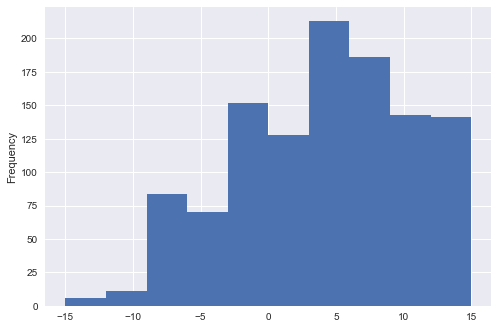

In [26]:
df[df["result"] == 0]["seed"].plot.hist();

In [32]:
import plotly.express as px
fig = px.histogram(a, x="sepal_width", y="sepal_length", color="species")

fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['seed'] but received: sepal_width

In [29]:
a = df[df["result"] == 0]["seed"]

In [23]:
a.value_counts()

 3     100
 8      99
 1      98
-1      92
 7      81
 5      73
 11     73
 15     71
 9      68
 13     67
-3      50
-5      48
 4      40
-7      37
-8      31
 2      17
-4      17
-9      16
 0      13
-2      10
-11      8
 6       6
-6       5
-13      5
 12      3
-10      2
 10      2
-15      1
-12      1
Name: seed, dtype: int64